In [54]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential 


In [55]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import  utils
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [56]:
orc_df = pd.read_csv("orchid-1.csv", sep=";")
print(orc_df.head(5))


   timestamp  ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF  \
0          0  1200.00             1.5           10.5           -2.0   
1        100  1201.75             1.5            9.5           -2.0   
2        200  1201.75             1.5            9.5           -2.0   
3        300  1201.75             1.5            9.5           -2.0   
4        400  1201.75             1.5            9.5           -2.0   

    SUNLIGHT  HUMIDITY  DAY  
0  2500.0000  79.00000   -1  
1  2499.4197  79.00410   -1  
2  2498.8457  79.00821   -1  
3  2498.2780  79.01234   -1  
4  2497.7166  79.01649   -1  


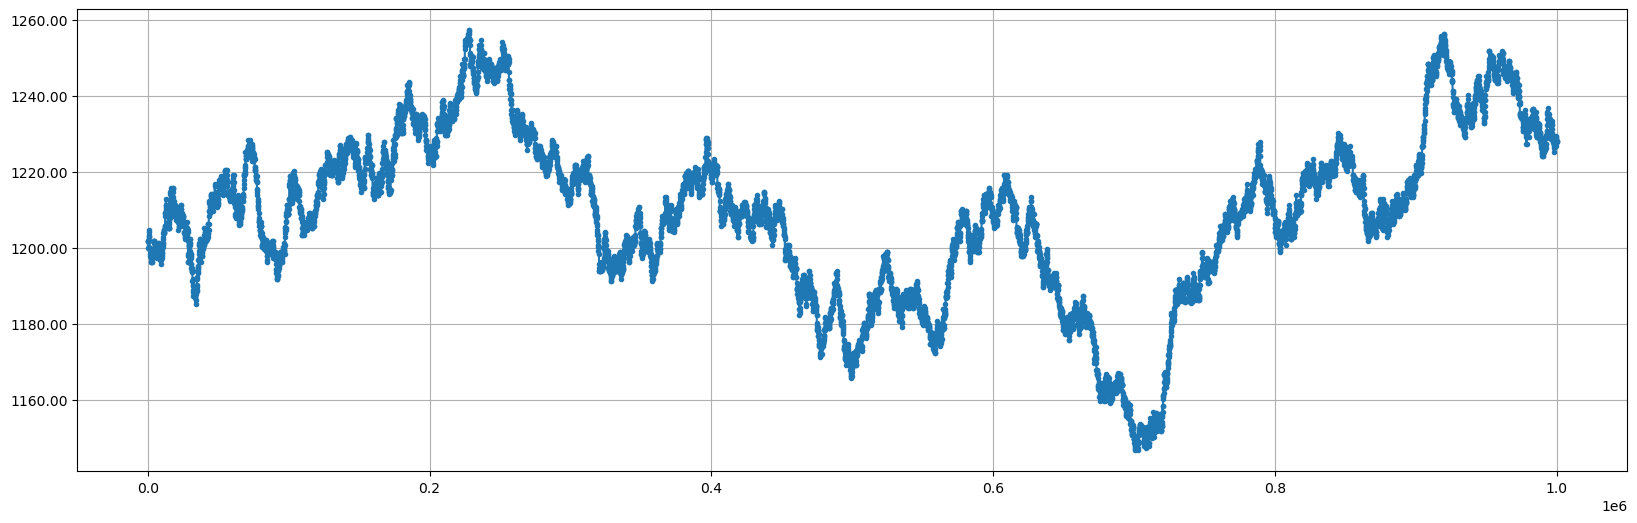

In [57]:
timestamps = orc_df['timestamp']
ORCHIDS_PRICE = orc_df['ORCHIDS']
ORCHIDS_Trans = orc_df['TRANSPORT_FEES']

# Configure and display the plot
plt.figure(figsize=(20, 6))  # Adjust the figure size as needed
plt.plot(timestamps, ORCHIDS_PRICE, marker='.', linestyle='-')


plt.grid(True)

plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

plt.show()

In [5]:

new_df = orc_df.loc[:, orc_df.columns != 'timestamp']
new_df = new_df.loc[:, new_df.columns != 'DAY']
print(new_df.head(5))


   ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF   SUNLIGHT  HUMIDITY
0  1200.00             1.5           10.5           -2.0  2500.0000  79.00000
1  1201.75             1.5            9.5           -2.0  2499.4197  79.00410
2  1201.75             1.5            9.5           -2.0  2498.8457  79.00821
3  1201.75             1.5            9.5           -2.0  2498.2780  79.01234
4  1201.75             1.5            9.5           -2.0  2497.7166  79.01649


In [68]:
new_df = pd.read_csv("orchid-1.csv", sep=";")

X_train = new_df[['SUNLIGHT', 'HUMIDITY']].values
y_train = new_df['ORCHIDS'].values

test_df = pd.read_csv("orchid1.csv", sep=";")
X_test = test_df[['SUNLIGHT', 'HUMIDITY']].values
y_test = test_df['ORCHIDS'].values

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='linear'),
    tf.keras.layers.Dense(5, activation='linear'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test)

print("Mean Absolute Error on Test Set:", mae)


Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1449369.2500 - mae: 1203.6967 - val_loss: 1509639.2500 - val_mae: 1228.5728
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 1428422.3750 - mae: 1194.8152 - val_loss: 1518698.8750 - val_mae: 1232.1573
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 1346808.0000 - mae: 1159.1519 - val_loss: 1523150.3750 - val_mae: 1233.4866
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 1181176.1250 - mae: 1081.2122 - val_loss: 1499634.0000 - val_mae: 1222.7201
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 938786.4375 - mae: 952.9365 - val_loss: 1409226.8750 - val_mae: 1183.5820
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 685417.2500 - mae: 796.0147 - val_loss: 1210095.8750 - val_mae: 1095.4805
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - loss: 434931.2812 - mae: 610.7853 - val_loss: 913273.0625 - val_mae: 951.4649
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 5

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


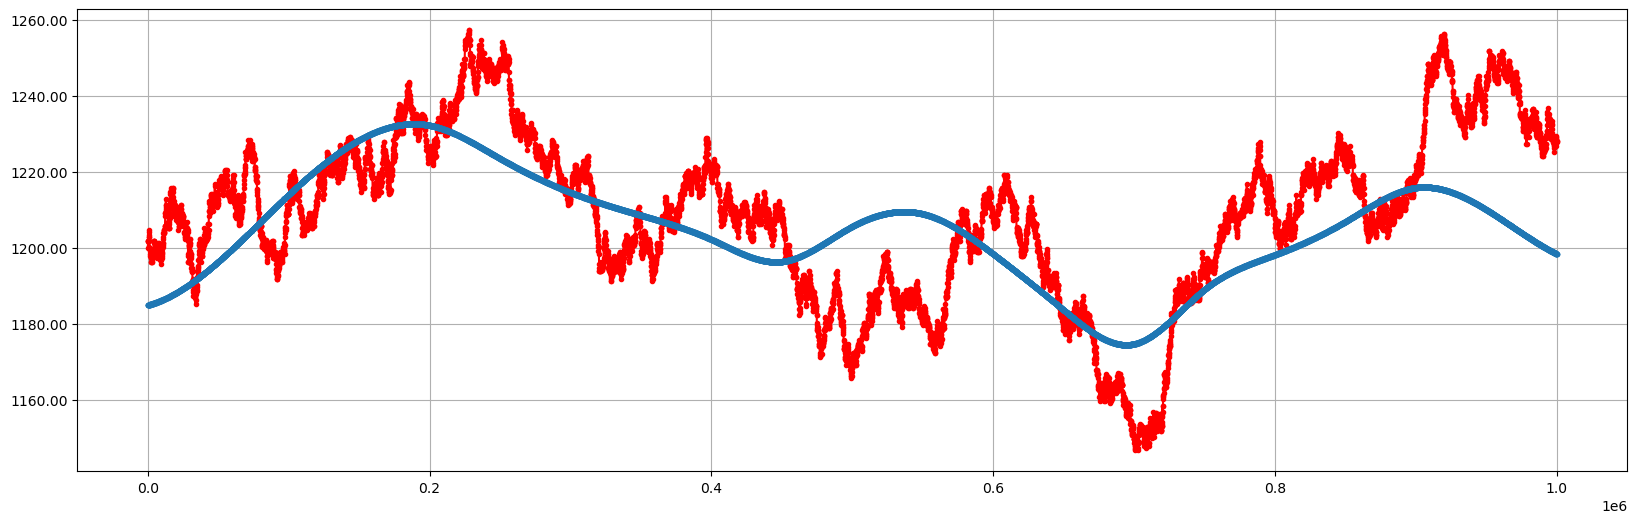

In [69]:
orc_df = pd.read_csv("orchid-1.csv", sep=";")

X_trial = orc_df[['SUNLIGHT', 'HUMIDITY']].values
predict = model.predict(scaler.fit_transform(X_trial))

timestamps = orc_df['timestamp']
ORCHIDS_PRICE = orc_df['ORCHIDS']

# Configure and display the plot
plt.figure(figsize=(20, 6))  # Adjust the figure size as needed
plt.plot(timestamps, ORCHIDS_PRICE, marker='.', linestyle='-',color ='red')
plt.plot(timestamps, predict, marker='.', linestyle='-')


plt.grid(True)

plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

plt.show()

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - loss: 1449791.3750 - mae: 1203.8927 - val_loss: 1504383.8750 - val_mae: 1226.4398
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 1433700.2500 - mae: 1197.1511 - val_loss: 1501129.8750 - val_mae: 1225.0881
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 1384515.0000 - mae: 1176.1917 - val_loss: 1491296.5000 - val_mae: 1220.9336
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 1269376.6250 - mae: 1124.9467 - val_loss: 1465738.0000 - val_mae: 1209.9777
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 1091764.1250 - mae: 1039.4382 - val_loss: 1412663.6250 - val_mae: 1186.9415
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 877206.5625 - mae: 923.0422 - val_loss: 1315531.0000 - val_mae: 1144.1317
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 646605.2500 - mae: 777.7488 - val_loss: 1149248.5000 - val_mae: 1068.3550
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━

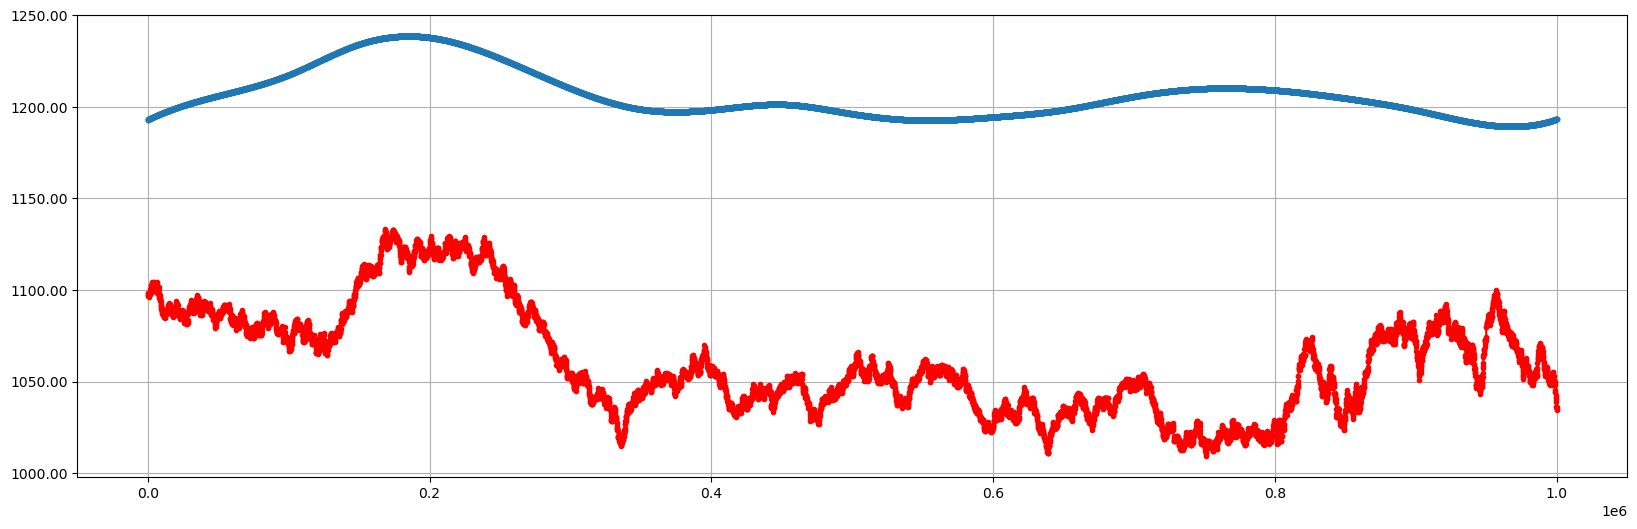

In [28]:
new_df = pd.read_csv("orchid-1.csv", sep=";")

X_train = new_df[['SUNLIGHT', 'HUMIDITY']].values
y_train = new_df['ORCHIDS'].values

test_df = pd.read_csv("orchid1.csv", sep=";")
X_test = test_df[['SUNLIGHT', 'HUMIDITY']].values
y_test = test_df['ORCHIDS'].values

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='linear'),
    tf.keras.layers.Dense(4, activation='linear'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test)

print("Mean Absolute Error on Test Set:", mae)


orc_df = pd.read_csv("orchid1.csv", sep=";")

X_trial = orc_df[['SUNLIGHT', 'HUMIDITY']].values
predict = model.predict(scaler.fit_transform(X_trial))

timestamps = orc_df['timestamp']
ORCHIDS_PRICE = orc_df['ORCHIDS']

# Configure and display the plot
plt.figure(figsize=(20, 6))  # Adjust the figure size as needed
plt.plot(timestamps, ORCHIDS_PRICE, marker='.', linestyle='-',color ='red')
plt.plot(timestamps, predict, marker='.', linestyle='-')


plt.grid(True)

plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

plt.show()


Epoch 1/30


/Users/amlannag/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


751/751 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - loss: 1094870.3750 - mae: 1022.0334 - val_loss: 677162.5625 - val_mae: 788.8320
Epoch 2/30
751/751 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 289945.4062 - mae: 442.1571 - val_loss: 97804.4766 - val_mae: 164.5687
Epoch 3/30
751/751 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 5496.2227 - mae: 60.0232 - val_loss: 55969.3555 - val_mae: 118.8629
Epoch 4/30
751/751 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 2491.5684 - mae: 40.5012 - val_loss: 35968.5000 - val_mae: 107.4224
Epoch 5/30
751/751 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 1700.0840 - mae: 33.5548 - val_loss: 28428.9609 - val_mae: 105.5463
Epoch 6/30
751/751 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 1441.7083 - mae: 30.4058 - val_loss: 23471.2773 - val_mae: 99.1530
Epoch 7/30
751/751 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 1443.0211 - mae: 30.0302 - val_loss: 22115.6055 - val_mae: 96.8407
Epoch 8/30
751/751 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 1479.3352 - mae: 30.5192 - val_l

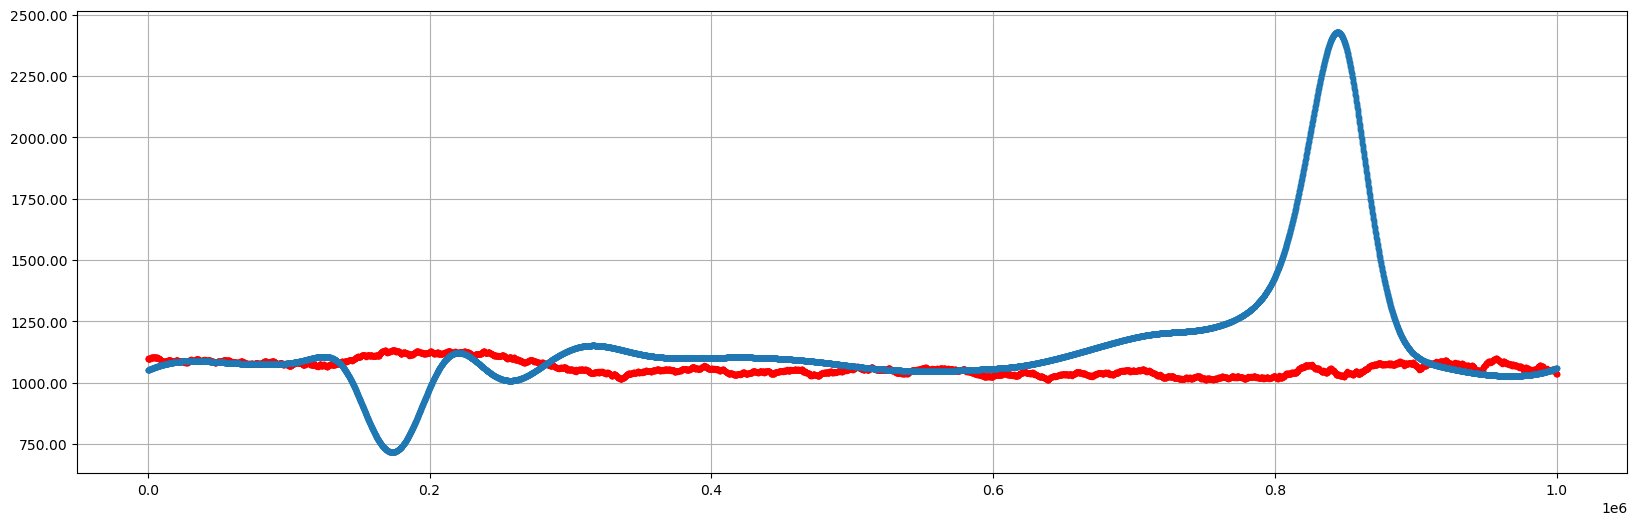

In [65]:
new_df = pd.read_csv("orchid_data.csv")


X_train = new_df[['SUNLIGHT', 'HUMIDITY']].values
y_train = new_df['ORCHIDS'].values

test_df = pd.read_csv("orchid1.csv", sep=";")
X_test = test_df[['SUNLIGHT', 'HUMIDITY']].values
y_test = test_df['ORCHIDS'].values

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

def polynomial_activation(x):
    return tf.math.pow(x, 3)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation=polynomial_activation, input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation=polynomial_activation),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test)

print("Mean Absolute Error on Test Set:", mae)


orc_df = pd.read_csv("orchid1.csv", sep=";")

X_trial = orc_df[['SUNLIGHT', 'HUMIDITY']].values
predict = model.predict(scaler.fit_transform(X_trial))

timestamps = orc_df['timestamp']
ORCHIDS_PRICE = orc_df['ORCHIDS']

# Configure and display the plot
plt.figure(figsize=(20, 6))  # Adjust the figure size as needed
plt.plot(timestamps, ORCHIDS_PRICE, marker='.', linestyle='-',color ='red')
plt.plot(timestamps, predict, marker='.', linestyle='-')


plt.grid(True)

plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

plt.show()


,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1


Epoch 1/30


/Users/amlannag/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


751/751 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - loss: 1010736.3750 - mae: 972.0522 - val_loss: 22066.6973 - val_mae: 123.1121
Epoch 2/30
751/751 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - loss: 7917.1631 - mae: 64.4426 - val_loss: 11923.6025 - val_mae: 80.3481
Epoch 3/30
751/751 ━━━━━━━━━━━━━━━━━━━━ 1s 749us/step - loss: 1514.0011 - mae: 30.2180 - val_loss: 14649.6201 - val_mae: 88.6833
Epoch 4/30
751/751 ━━━━━━━━━━━━━━━━━━━━ 1s 648us/step - loss: 1478.6892 - mae: 29.8722 - val_loss: 9525.9688 - val_mae: 71.7036
Epoch 5/30
751/751 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 1465.4987 - mae: 29.9998 - val_loss: 9621.9531 - val_mae: 72.5022
Epoch 6/30
751/751 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 1480.2428 - mae: 30.2107 - val_loss: 9241.3740 - val_mae: 71.9894
Epoch 7/30
751/751 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 1477.6410 - mae: 30.1623 - val_loss: 7533.6431 - val_mae: 65.1065
Epoch 8/30
751/751 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - loss: 1508.5801 - mae: 30.4870 - val_loss: 9584.422

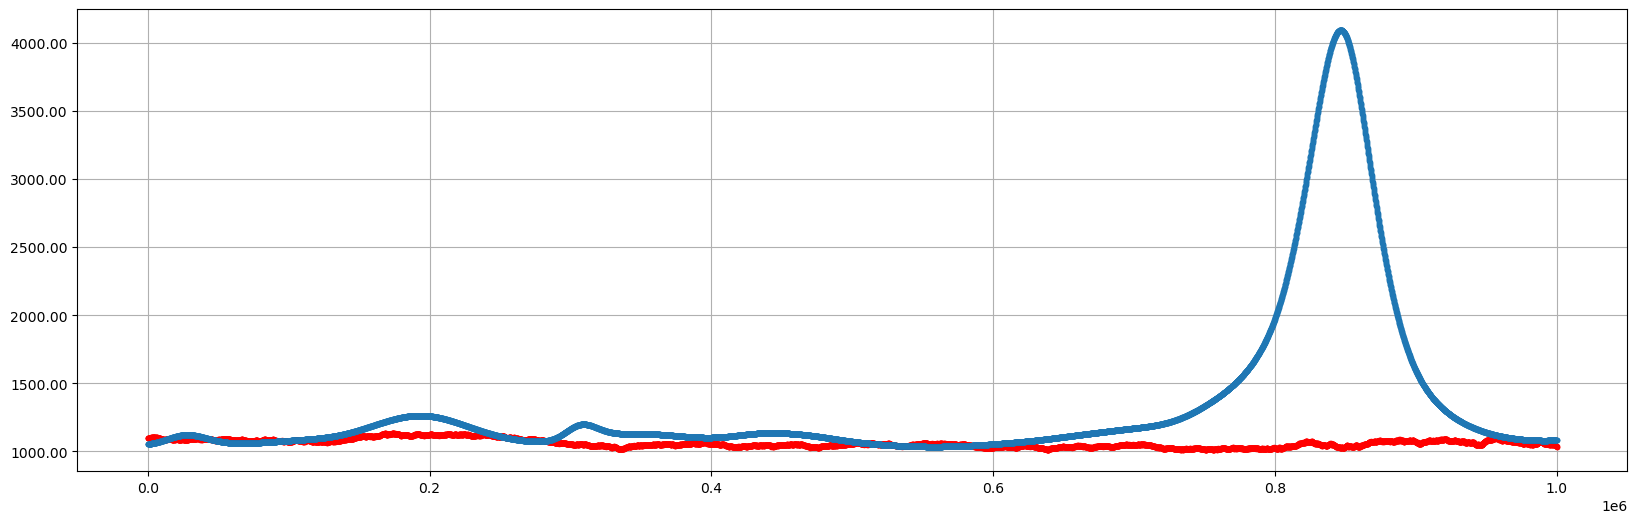

In [60]:
new_df = pd.read_csv("orchid_data.csv")


X_train = new_df[['SUNLIGHT', 'HUMIDITY']].values
y_train = new_df['ORCHIDS'].values

test_df = pd.read_csv("orchid1.csv", sep=";")
X_test = test_df[['SUNLIGHT', 'HUMIDITY']].values
y_test = test_df['ORCHIDS'].values

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

def polynomial_activation(x):
    return tf.math.pow(x, 2)

def exponential_activation(x):
    return tf.math.exp(x)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation=polynomial_activation, input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation=exponential_activation),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test)

print("Mean Absolute Error on Test Set:", mae)


orc_df = pd.read_csv("orchid1.csv", sep=";")

X_trial = orc_df[['SUNLIGHT', 'HUMIDITY']].values
predict = model.predict(scaler.fit_transform(X_trial))

timestamps = orc_df['timestamp']
ORCHIDS_PRICE = orc_df['ORCHIDS']

# Configure and display the plot
plt.figure(figsize=(20, 6))  # Adjust the figure size as needed
plt.plot(timestamps, ORCHIDS_PRICE, marker='.', linestyle='-',color ='red')
plt.plot(timestamps, predict, marker='.', linestyle='-')


plt.grid(True)

plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

plt.show()


Epoch 1/30
751/751 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - loss: 985205.6250 - mae: 938.3474 - val_loss: 499367.6562 - val_mae: 364.5589
Epoch 2/30
751/751 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 26322.3340 - mae: 125.2204 - val_loss: 130592.1016 - val_mae: 232.8748
Epoch 3/30
751/751 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 7270.7046 - mae: 66.6497 - val_loss: 64670.0156 - val_mae: 165.9142
Epoch 4/30
751/751 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 3599.3938 - mae: 49.1114 - val_loss: 40694.3789 - val_mae: 134.4294
Epoch 5/30
751/751 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 2533.4773 - mae: 41.3156 - val_loss: 29051.7812 - val_mae: 116.7171
Epoch 6/30
751/751 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 2101.8049 - mae: 37.2423 - val_loss: 26402.4121 - val_mae: 115.4361
Epoch 7/30
751/751 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 1858.8772 - mae: 34.8638 - val_loss: 21481.1855 - val_mae: 104.2502
Epoch 8/30
751/751 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - loss: 1773.2123 - mae: 33.9

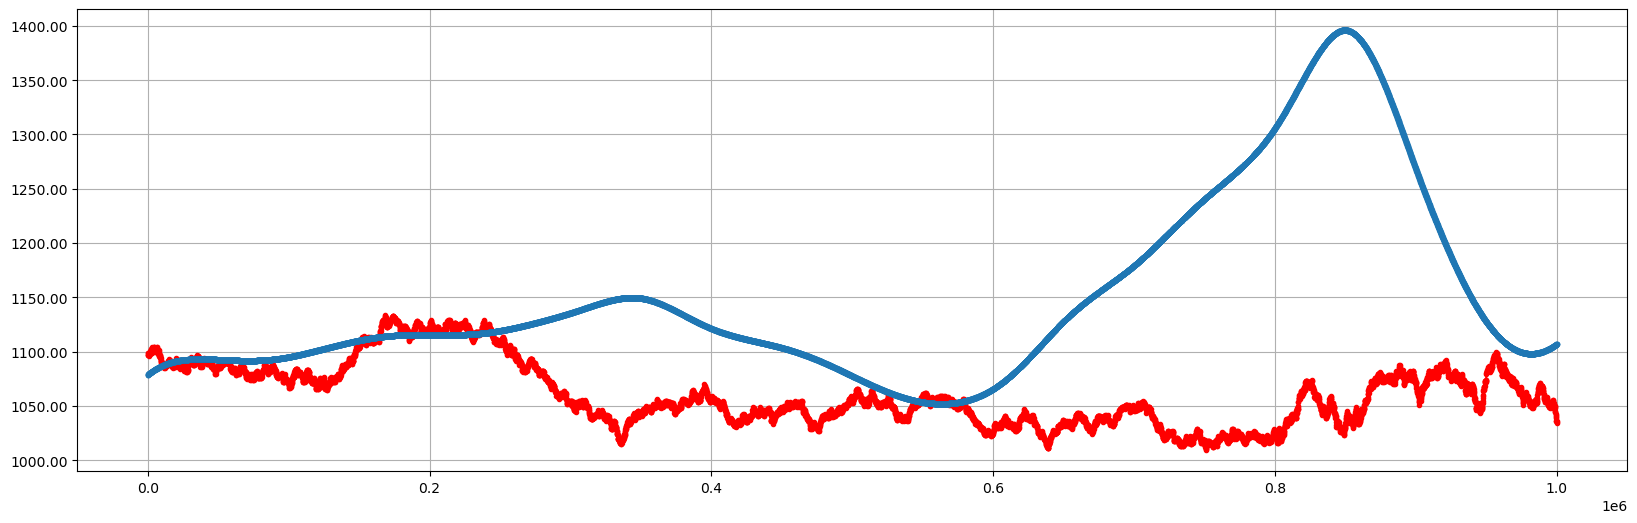

In [64]:
new_df = pd.read_csv("orchid_data.csv")


X_train = new_df[['SUNLIGHT', 'HUMIDITY']].values
y_train = new_df['ORCHIDS'].values

test_df = pd.read_csv("orchid1.csv", sep=";")
X_test = test_df[['SUNLIGHT', 'HUMIDITY']].values
y_test = test_df['ORCHIDS'].values

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

def polynomial_activation(x):
    return tf.math.pow(x, 2)

def exponential_activation(x):
    return tf.math.exp(x)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=exponential_activation),
    tf.keras.layers.Dense(10, activation=exponential_activation),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test)

print("Mean Absolute Error on Test Set:", mae)


orc_df = pd.read_csv("orchid1.csv", sep=";")

X_trial = orc_df[['SUNLIGHT', 'HUMIDITY']].values
predict = model.predict(scaler.fit_transform(X_trial))

timestamps = orc_df['timestamp']
ORCHIDS_PRICE = orc_df['ORCHIDS']

# Configure and display the plot
plt.figure(figsize=(20, 6))  # Adjust the figure size as needed
plt.plot(timestamps, ORCHIDS_PRICE, marker='.', linestyle='-',color ='red')
plt.plot(timestamps, predict, marker='.', linestyle='-')


plt.grid(True)

plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

plt.show()


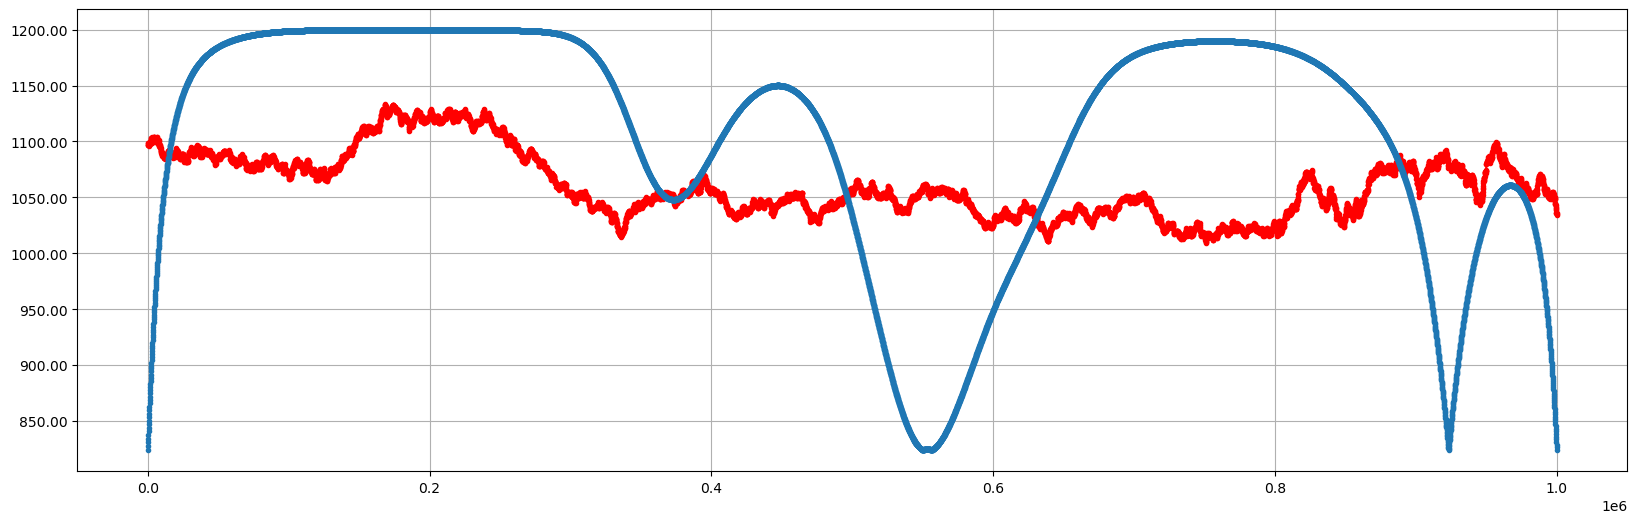

In [72]:
def trial(sum,hum):
    a=0.0181782
    b=2.10601
    c=0.120155
    g=100.033
    d=-375.646
    h=1199.62
    ln=-0.02020270731
    result = d*np.exp(((g*abs(hum-70)*ln))/5)+h

    return result 



orc_df = pd.read_csv("orchid1.csv", sep=";")

X_trial = orc_df[['SUNLIGHT', 'HUMIDITY']].values
sunlight = orc_df[['SUNLIGHT']].values
humidity = orc_df[['HUMIDITY']].values
predict = trial(sunlight,humidity)

timestamps = orc_df['timestamp']
ORCHIDS_PRICE = orc_df['ORCHIDS']

# Configure and display the plot
plt.figure(figsize=(20, 6))  # Adjust the figure size as needed
plt.plot(timestamps, ORCHIDS_PRICE, marker='.', linestyle='-',color ='red')
plt.plot(timestamps, predict, marker='.', linestyle='-')


plt.grid(True)

plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

plt.show()